In [67]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])



In [68]:
df_1 = df.copy()
df_1['job_skills'] = df_1['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [69]:
df_explode = df_1.explode('job_skills')
df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [70]:
df_grouped = df_explode.groupby(['job_title_short','job_skills']).size()

In [71]:
df_count = df_grouped.reset_index(name='skill_count')


In [72]:
df_count.sort_values(by='skill_count',ascending=False,inplace=True)

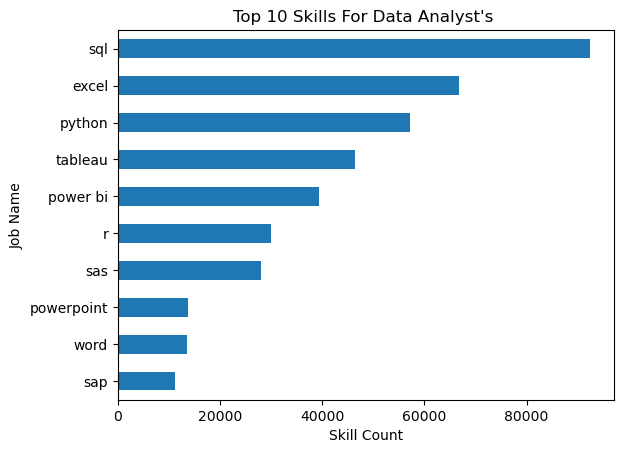

In [74]:
job_title = 'Data Analyst'
Top_Size = 10
df_count = df_count[df_count['job_title_short'] == job_title].head(Top_Size)
df_count.plot(kind='barh',x='job_skills',y='skill_count',legend=False)
plt.gca().invert_yaxis()
plt.title(f"Top {Top_Size} Skills For {job_title}'s ")
plt.xlabel('Skill Count')
plt.ylabel('Job Name')
plt.show()